# Caltech Machine Learning Homework # 3

In [9]:
import numpy as np
from sklearn.linear_model import Perceptron
import random
import math
import matplotlib.pyplot as plt
from typing import List
from itertools import product
import scipy.special

Instructions: https://work.caltech.edu/homework/hw3.pdf

Answers: http://work.caltech.edu/homework/hw3_sol.pdf

## Generalization Error

![](imgs/generr1.png)

The bound should be

M = 1
epsilon = 0.05

2 * M * exp(-2 * (epsilon**2) * N) = 0.03

![](imgs/math1.jpg)

So the minimum number of N needed should be (b)

### 2. Repeat for the case M = 10

![](imgs/math2.jpg)

So

In [3]:
M = 10
N_bound = (np.log(0.03) - np.log(2) - np.log(M)) / (-2 * (0.05**2))
N_bound

1300.4580341747944

So the answer here is (c)

### 3. Repeat for the case M = 100

In [6]:
M = 100
N_bound = (np.log(0.03) - np.log(2) - np.log(M)) / (-2 * (0.05**2))
N_bound

1760.9750527736037

So the answer here is (d)

## Break Point

### 4.
As shown in class, the (smallest) break point for the Perceptron Model in the
two-dimensional case (R
2
) is 4 points. What is the smallest break point for
the Perceptron Model in R
3
? (i.e., instead of the hypothesis set consisting of
separating lines, it consists of separating planes.)

I would think 4 as well?

But it's wrong.

Why?

Let's build a 3D-Perceptron to find out. A smallest breakpoint `k` by definition means that there is a combination of `k-1` points that can be shattered by the 3D-Perceptron, but there is no combination of `k` points that can be shattered.

So let's first, for `N=4`, 

1. Generate `EXPERIMENTS` number of random samples of `N` points (x,y,z) (since that's the breakpoint for 2D perceptrons)
2. For each point, find all `2^N` dichotomies (possible solutions)
3. Attempt to fit all dichotomies, and see if 3D PLA converges for all of them. 
3a.) If it does, then we've "shattered" this data set of size `N`, and hence `N` cannot be a breakpoint.
3b.) If it doesn't, repeat to see if was just a "bad" random choice of set, and any of the others satisfy 3a). If not, we conclude that `N` is a breakpoint.

                                                


In [56]:
N = 4
EXPERIMENTS = 1000

# Generate the set of all 2^N possible dichotomies (the cartesian product of [0,1] with itself, with N repetitions) 
DICHOTOMIES = np.array(list(product([0, 1], repeat = N)))

for _ in range(EXPERIMENTS):
    # Generate N random (x, y, z) points
    X = np.random.uniform(-1, 1, size=(N, 3))
    shattered = True
    for y in DICHOTOMIES:
        clf = Perceptron(tol=None) # We don't want the perceptron to converge at all if it can't find a solution
        
        # Working around this Perceptron model not allowing for only 1 class in the "training data"
        # That means we won't know if it shatters the points fully (2/16 solutions can't be generated)
        # But this should still do
        if len(np.unique(y)) == 1:
            clf.partial_fit(X, y, classes=np.array([0,1]))
        else:
            clf.fit(X, y) 
            
        if clf.score(X, y) != 1:
            print(f"Looks like we were unable to solve this data set for the dichotomy {y} on data set {X}")
            print(f"Score is {clf.score(X,y)}")
            shattered = False
            
    if shattered:
        print(f"We've shattered the data set {X}, hence {N} cannot be a breakpoint")
        break

We've shattered the data set [[ 0.30430459  0.68612827  0.13160432]
 [ 0.43895557  0.84705855  0.75776665]
 [ 0.64361878  0.71194008  0.65190386]
 [ 0.63154882 -0.10196242 -0.0353995 ]], hence 4 cannot be a breakpoint


We conclude that 4 cannot be a breakpoint. Let's try 5.

In [59]:
N = 5
EXPERIMENTS = 1000

# Generate the set of all 2^N possible dichotomies (the cartesian product of [0,1] with itself, with N repetitions) 
DICHOTOMIES = np.array(list(product([0, 1], repeat = N)))

for _ in range(EXPERIMENTS):
    # Generate N random (x, y, z) points
    X = np.random.uniform(-1, 1, size=(N, 3))
    shattered = True
    for y in DICHOTOMIES:
        clf = Perceptron(tol=None,shuffle=False) # We don't want the perceptron to converge at all if it can't find a solution
        
        # Working around this Perceptron model not allowing for only 1 class in the "training data"
        # That means we won't know if it shatters the points fully (2/16 solutions can't be generated)
        # But this should still do
        if len(np.unique(y)) == 1:
            clf.partial_fit(X, y, classes=np.array([0,1]))
        else:
            clf.fit(X, y) 
            
        if clf.score(X, y) != 1:
#             print(f"Looks like we were unable to solve this data set for the dichotomy {y} on data set {X}")
#             print(f"Score is {clf.score(X,y)}")
            shattered = False
            
    if shattered:
        print(f"We've shattered the data set {X}, hence {N} cannot be a breakpoint")
        break

We've tried 1000 different samples of size 5, and none could be shattered by the 3D Perceptron.

Hence we conclude that 5 is a breakpoint of the 3D Perceptron.

![](imgs/growth.png)

The only restriction on the growth function is that it is bounded by 2^N

v) is the bound itself, so definitely possible


i) is smaller than 2^N for all N, so possible

Let's graph the others!

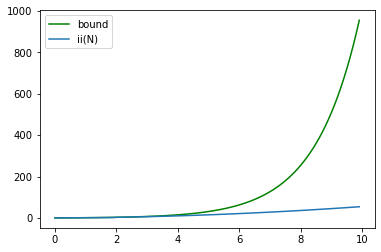

In [17]:
def bound(N):
    return 2 ** N

def two(N):
    return 1 + N + scipy.special.comb(N, 2)

x = np.arange(0, 10, 0.1)
yBound = bound(x)
yTwo = two(x)

plt.plot(x, yBound, color='g', label='bound')
plt.plot(x, yTwo, label='ii(N)')
plt.legend()
plt.show()

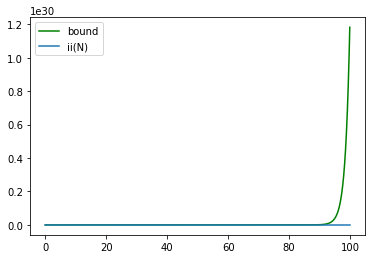

In [18]:
x = np.arange(0, 100, 0.1)
yBound = bound(x)
yTwo = two(x)

plt.plot(x, yBound, color='g', label='bound')
plt.plot(x, yTwo, label='ii(N)')
plt.legend()
plt.show()


That's looking very good for ii), which leaves possible answers (b), (d) and (e)

Let's look at (iii)

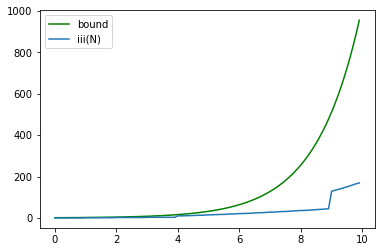

In [26]:
def three(N):
    acc = 0
    max = math.floor(math.sqrt(N))
    for i in range(1, max + 1):
        acc += scipy.special.comb(N, i)
    return acc


X = np.arange(0, 10, 0.1)
yBound = bound(X)
yThree = np.vectorize(three)(X)

plt.plot(X, yBound, color='g', label='bound')
plt.plot(X, yThree, label='iii(N)')
plt.legend()
plt.show()    

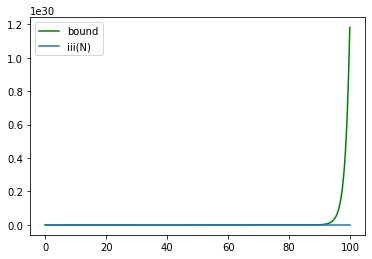

In [27]:
X = np.arange(0, 100, 0.1)
yBound = bound(X)
yThree = np.vectorize(three)(X)

plt.plot(X, yBound, color='g', label='bound')
plt.plot(X, yThree, label='iii(N)')
plt.legend()
plt.show()    

That's also looking very promising for (iii), so (b) can't be the solution and we need to look at (iv) next:

Now 2^(N/2) is clearly bounded by 2^N, so (iv) also works.

Hence we conclude the solution is (e)

Except.... it's wrong =) why? 

Is there something wrong with having the floor() bound in a growth function?

Ooooooh, it's because N=1 for (iii) and (iv), which means that the max number of dichotomies on a single data point is 1, which also means that the max number of dichotomies for any N > 1 cannot exceed 1. However, the formula returns larger numbers than 1 for N>1, so it's not a valid growth function.

## Fun with Intervals

![](imgs/intervals1.png)

![](imgs/2intervalsBreakPoint1.jpg)

![](imgs/2intervalsBreakPoint2.jpg)

![](imgs/intervals2.png)

Let's look at the bound first to see if we can exclude anything.

![](imgs/2intervalsGrowth1.jpg)

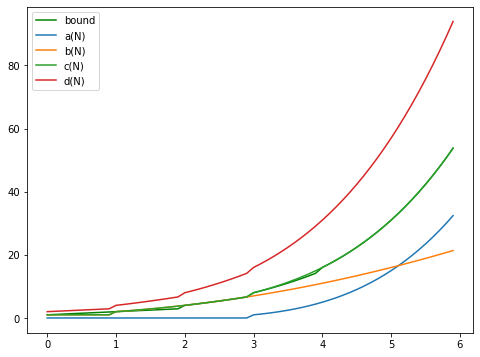

In [15]:
def B(N):
    return 1 + N + scipy.special.comb(N, 2) + scipy.special.comb(N, 3) + scipy.special.comb(N, 4)

def a(N):
    return scipy.special.comb(N + 1, 4)

def b(N):
    return scipy.special.comb(N + 1, 2) + 1

def c(N):
    return scipy.special.comb(N + 1, 4) + scipy.special.comb(N + 1, 2) + 1

def d(N):
    return scipy.special.comb(N + 1, 4) + scipy.special.comb(N + 1, 3) + scipy.special.comb(N + 1, 2) + scipy.special.comb(N + 1, 1) + 1


X = np.arange(0, 6, 0.1)
yB = np.vectorize(B)(X)
ya = np.vectorize(a)(X)
yb = np.vectorize(b)(X)
yc = np.vectorize(c)(X)
yd = np.vectorize(d)(X)


plt.figure(figsize=(8, 6))
plt.plot(X, yB, color='g', label='bound')
plt.plot(X, ya, label='a(N)')
plt.plot(X, yb, label='b(N)')
plt.plot(X, yc, label='c(N)')
plt.plot(X, yd, label='d(N)')
plt.legend()
plt.show()    

(d) clearly exceeds the bound, so we can exclude that.

(c) looks identical to the bound, so that's looking SPICY

To be sure, let's zoom in to see how the two remaining options, (a) and (b), perform on N=4

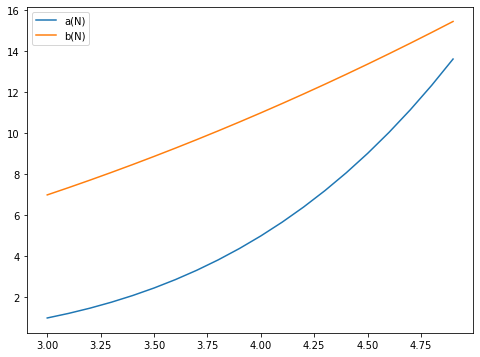

In [16]:
X = np.arange(3, 5, 0.1)
ya = np.vectorize(a)(X)
yb = np.vectorize(b)(X)


plt.figure(figsize=(8, 6))
plt.plot(X, ya, label='a(N)')
plt.plot(X, yb, label='b(N)')
plt.legend()
plt.show()    

Both (a) and (b) clearly have a breakpoint of 4 or less, since they are < 2^N=16 at N=4.

Hence we conclude that (c) must be the growth function we're looking for.

![](imgs/intervals3.png)

Let's look at some of the values of M we already know:

M = 1, "positive intervals", has breakpoint 3.
The only option that satisfies this is (d) already.

Let's test the validity of (d) by looking at "2-intervals":
M = 2, "2-intervals", has breakpoint 5 (from problem (6) above)

(d) looks correct.

## Convex Sets: The Triangle

![](imgs/convex_triangle.png)

![](imgs/triangle1.jpg)

![](imgs/triangle2.jpg)

![](imgs/triangle3.jpg)

If 7 is really the breakpoint, then the answer should be (c)

But...it's (d)! Where did we go wrong?

Aha! The circle is not the "best" structure to put the points on for triangular separation. Maybe it's the polygon?

![](imgs/triangle4.jpg)

Indeed =)

## Non-Convex Sets: Concentric Circles

![](imgs/concentric.png)